<a href="https://colab.research.google.com/github/Swayamg21/DAV_Experiments_17/blob/main/DAV_EXP_3_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim : Multiple Linear Regression in Python and R**

Lab Outcome : Implement various Regression techniques for prediction.

# **Tasks to be Performed :**

1. Explore Python Libraries and perform Multiple Regression.
2. Explore R libraries and perform Multiple Regression.



# **Multiple Linear Regression in Python:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#make a dataframe
df = pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
#number of columns and rows in dataset
df.shape

(10000, 6)

In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
#statistical information about dataset
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#check if there are any null values, luckily no null values in my case
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
#we see that extracirricular activities have categorical values: yes and no
#yes = 1
#no = 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [9]:
#we can now see that Extra cirricular activites is of type int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


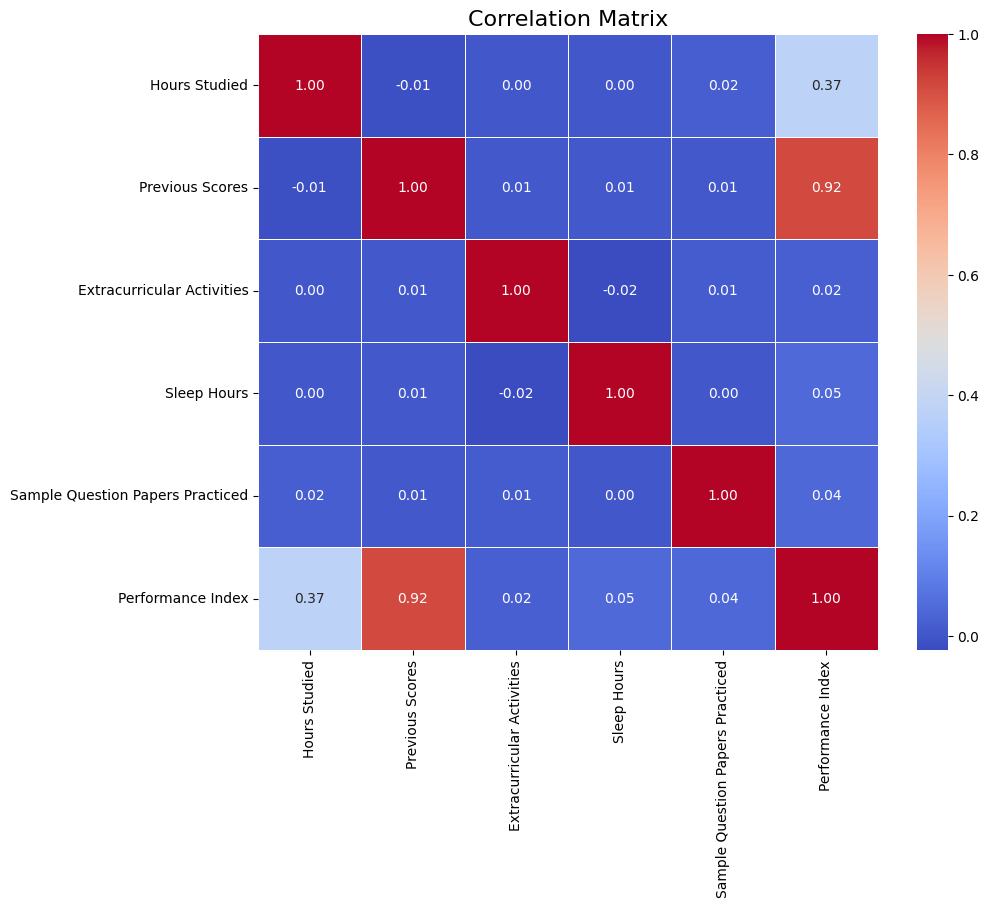

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [13]:
#dependent variable
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [14]:
#independent variables
X = df.drop('Performance Index', axis=1)
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [15]:
#split the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#create a model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#finding the slope and intercept
intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'   Coefficient for X{i + 1}: {coef:.2f}')

Intercept: -33.92
Coefficients:
   Coefficient for X1: 2.85
   Coefficient for X2: 1.02
   Coefficient for X3: 0.61
   Coefficient for X4: 0.48
   Coefficient for X5: 0.19


In [19]:
y_pred = model.predict(X_test)
#the results:
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.082628398521853


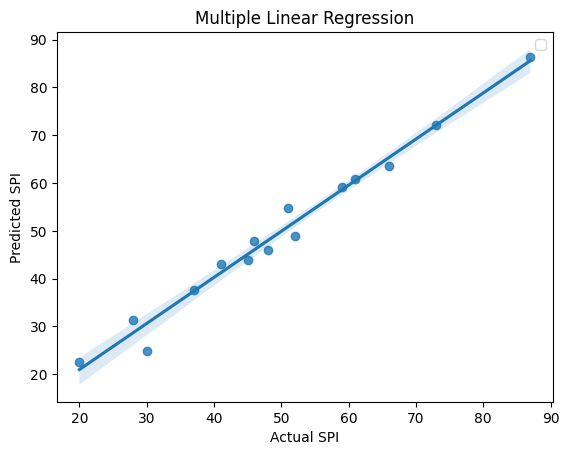

In [21]:
indices_to_plot = slice(0, 15)
sns.regplot(x=y_test[indices_to_plot], y=y_pred[indices_to_plot])
plt.xlabel('Actual SPI')
plt.ylabel('Predicted SPI')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

# **Multiple Linear Regression in R:**

In [1]:
#initialising the libraries
library(ggplot2)
library(dplyr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#creating a dataframe
csv_file_path <- "Student_Performance.csv"
my_data <- read.csv(csv_file_path)
str(my_data)

'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


In [3]:
library(ggplot2)

In [4]:
my_data

Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
<int>,<int>,<chr>,<int>,<int>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66
3,78,No,9,6,61
7,73,Yes,5,6,63
8,45,Yes,4,6,42
5,77,No,8,2,61


In [5]:
my_data$Extracurricular.Activities

[1] "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No" 
   [13] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No" 
   [25] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
   [37] "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No" 
   [49] "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "No" 
   [61] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "Yes"
   [73] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
   [85] "No"  "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No" 
   [97] "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes"
  [109] "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes"
  [121] "Yes" "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes"
  [133] "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes"
  [145] "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes"
  [157] "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
  [169] "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "No" 
  [181] "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "No" 
  [193] "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "No" 
  [205] "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes"
  [217] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "No"  "Yes"
  [229] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes"
  [241] "No"  "Yes" "No"  "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "Yes"
  [253] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
  [265] "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
  [277] "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes"
  [289] "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes"
  [301] "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No" 
  [313] "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes"
  [325] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes"
  [337] "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes"
  [349] "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
  [361] "No"  "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes"
  [373] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "No" 
  [385] "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes"
  [397] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No" 
  [409] "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes" "No"  "No" 
  [421] "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
  [433] "Yes" "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "No" 
  [445] "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No" 
  [457] "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes"
  [469] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "No" 
  [481] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
  [493] "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
  [505] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes"
  [517] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "No" 
  [529] "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "No"  "No" 
  [541] "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes"
  [553] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No" 
  [565] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No" 
  [577] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
  [589] "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
  [6

In [6]:
#extracirricular activites is categorical, we are going to convert it into numeric va;ues
my_data$Extracurricular.Activities <- ifelse(my_data$Extracurricular.Activities == "Yes", 1, 0)

In [7]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [8]:
X <- subset(my_data, select = -Performance.Index)
y <- data.frame(Y = my_data$Performance.Index)

In [9]:
set.seed(123)
split <- sample.split(y$Y, SplitRatio = 0.7)

#training and testing datasets for X
x_train <- subset(X, split == TRUE)
x_test <- subset(X, split == FALSE)

#training and testing datasets for Y
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

In [10]:
model <- lm(Y ~ ., data = cbind(y_train, x_train))

In [11]:
summary(model)
predictions <- predict(model, newdata = x_test)
# print(predictions)


Call:
lm(formula = Y ~ ., data = cbind(y_train, x_train))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0948 -1.3594  0.0051  1.3511  8.7398 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -34.064022   0.150724 -226.00   <2e-16 ***
Hours.Studied                      2.858961   0.009346  305.90   <2e-16 ***
Previous.Scores                    1.018266   0.001395  729.86   <2e-16 ***
Extracurricular.Activities         0.609038   0.048396   12.59   <2e-16 ***
Sleep.Hours                        0.471500   0.014261   33.06   <2e-16 ***
Sample.Question.Papers.Practiced   0.205496   0.008460   24.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 6994 degrees of freedom
Multiple R-squared:  0.9889,	Adjusted R-squared:  0.9889 
F-statistic: 1.249e+05 on 5 and 6994 DF,  p-value: < 2.2e-16


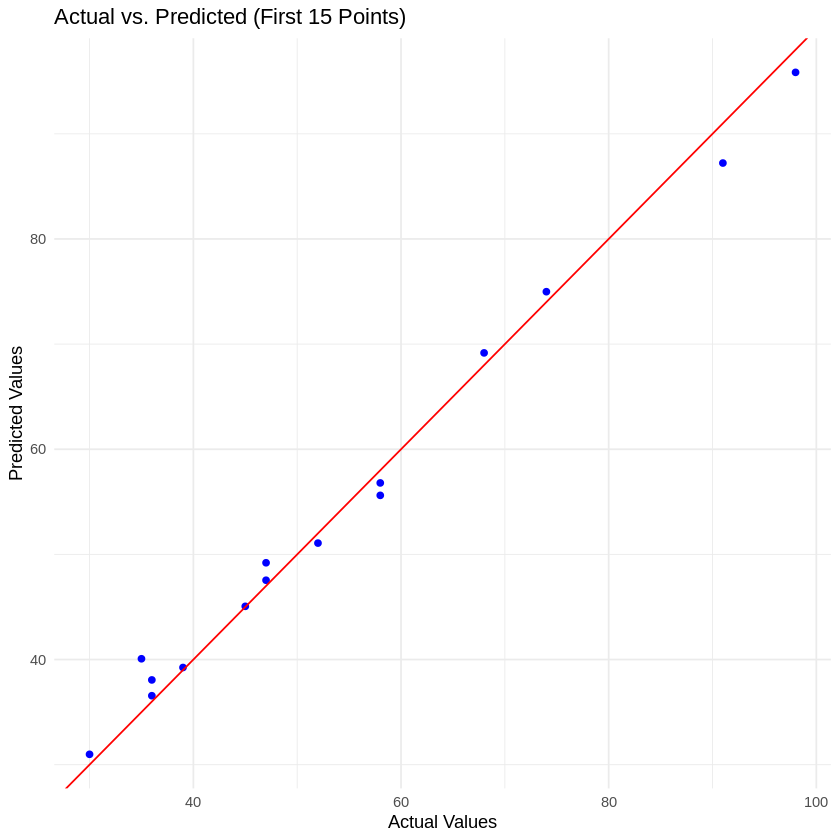

In [14]:
library(ggplot2)
plot_data <- data.frame(Actual = y_test$Y[1:15], Predicted = predictions[1:15])
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = 'blue') +
  geom_abline(intercept = 0, slope = 1, color = 'red') +
  labs(x = 'Actual Values', y = 'Predicted Values', title = 'Actual vs. Predicted (First 15 Points)') +
  theme_minimal()

# **Conclusion:**
1. Understood the concept of Multiple Linear Regression
2. Explored the packages in Python and R
3. Performed Multiple Linear Regression using the Libraries in Python and R

# **Acknowledgement:**
Dataset from: [Kaggle Link](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download)